Purpose

In [144]:
from sklearn import svm,preprocessing,metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,train_test_split
from scipy.stats import kurtosis, skew
from sklearn.datasets import make_classification
import numpy as np
import pylab as pl
import pandas as pd
import time

# Reading and transforming data

Dataset 1

In [176]:
#Reading data
#remove non-predictive variables
data=pd.read_csv('OnlineNewsPopularity.csv')
print("shape",data.shape)

data.drop(['url', ' timedelta'], axis=1, inplace=True)
data.shape

print("\n type of the variables \n", data.dtypes)

shape (39644, 61)

 type of the variables 
  n_tokens_title                   float64
 n_tokens_content                 float64
 n_unique_tokens                  float64
 n_non_stop_words                 float64
 n_non_stop_unique_tokens         float64
 num_hrefs                        float64
 num_self_hrefs                   float64
 num_imgs                         float64
 num_videos                       float64
 average_token_length             float64
 num_keywords                     float64
 data_channel_is_lifestyle        float64
 data_channel_is_entertainment    float64
 data_channel_is_bus              float64
 data_channel_is_socmed           float64
 data_channel_is_tech             float64
 data_channel_is_world            float64
 kw_min_min                       float64
 kw_max_min                       float64
 kw_avg_min                       float64
 kw_min_max                       float64
 kw_max_max                       float64
 kw_avg_max                     

In [177]:
#identifying categorical and numerical variables
#Shares variables will be the numerical variable
categorical_var=[' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',
             ' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world',
             ' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',
             ' weekday_is_friday',' weekday_is_saturday',' weekday_is_sunday',' is_weekend']

data_vars=data.columns.values.tolist()
numerical_var=[i for i in data_vars if i not in categorical_var]
numerical_var=numerical_var[0:len(numerical_var)-1]

In [178]:
#normalizing the numerical variables
data_numerical=data[numerical_var]
scaler = preprocessing.StandardScaler()
scaler.fit(data_numerical)  
data_numerical_scaled = pd.DataFrame(scaler.transform(data_numerical))
data_numerical_scaled.columns=data_numerical.columns

data_catergorical = data[categorical_var]
data_catergorical=data_catergorical.astype(object)

data2 = pd.concat([data_numerical_scaled,data_catergorical,data[' shares']], axis=1)
data2.columns=data.columns

mean :  3395.3801836343455
median: 1400.0
var  :  135182573.71299252
skew :  33.9625997792866
kurt :  1832.4413727401281


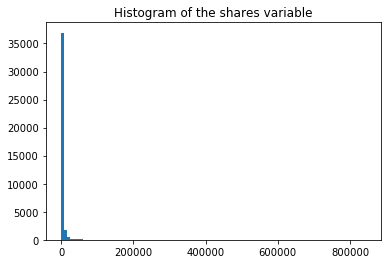

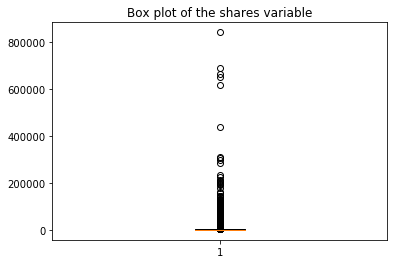

In [179]:
#checking for skewness and kurtosis of the outcome variable (shares)
print("mean : ", np.mean(data[' shares']))
print("median:", np.median(data[' shares']))
print("var  : ", np.var(data[' shares']))
print("skew : ",skew(data[' shares']))
print("kurt : ",kurtosis(data[' shares']))

pl.hist(data[' shares'],bins=100)
pl.title('Histogram of the shares variable')
pl.show()

pl.boxplot(data[' shares'])
pl.title('Box plot of the shares variable')
pl.show()

In [180]:
data3=pd.concat([data_numerical_scaled,data_catergorical,data[' shares']], axis=1)

#Considering if the number of shares above 1400 as high (denoted by 1) and the rest as low (denoted by 0)
#since the shares is skewed, considering a mid point (median) instead of mean
data3[' shares2']=np.where(data3[' shares']>1400, 1, 0)
Y_lo=data3[' shares2']
Y_lo=Y_lo.astype(object)
X_lo=data3.drop([' shares2',' shares'], axis=1)
print("split of number of records classified as high shares (1) vs low shares(0)\n",Y_lo.value_counts())

split of number of records classified as high shares (1) vs low shares(0)
 0    20082
1    19562
Name:  shares2, dtype: int64


In [181]:
#split the data into test and train
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_lo, Y_lo, test_size=0.3, random_state=42)
Y_train_1=list(Y_train_1)
Y_test_1=list(Y_test_1)

In [152]:
#output
Train_1=X_train_1
Test_1=X_test_1
Train_1['Y']=Y_train_1
Test_1['Y']=Y_test_1
Train_1.to_csv("OnlinePopulatity_train.csv")
Test_1.to_csv("OnlinePopulatity_test.csv")

C:\Users\saivi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\saivi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Dataset 2

In [249]:
#reading data
bank=pd.read_csv('bankdata.csv', delimiter=';')
print("Total number of records:",len(bank),"\n")
#number of records: 
print("Variable and their data type")
bank.dtypes

Total number of records: 41188 

Variable and their data type


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

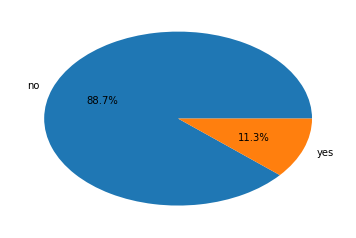

In [250]:
#proportion of clients subscribed for a CD
data=bank.groupby('y')['y'].count()/len(bank)*100
pl.pie(data,autopct='%1.1f%%', labels=[data.index[0],data.index[1]])
pl.show()
# % of clients subsribed for CD is 11.3%

In [251]:
#missing values
data.isnull().sum()
#no missing values 

0

In [252]:
bank["y"]=np.where(bank["y"] == "yes", 1, 0)
bank["y"].value_counts()
bank_y=bank["y"]

In [253]:
#one hot encoding for categorical variables
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

data_vars=bank.columns.values.tolist()
numerical_var=[i for i in data_vars if i not in cat_vars]

bank_cat=bank[cat_vars]
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bank[var], prefix=var)
    data1=bank_cat.join(cat_list)
    bank_cat=data1

cat_vars=['previous','duration','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y_0','y_1','y']
data_vars=bank_cat.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
bank_cat=bank_cat[to_keep]

#bank_cat.dtypes

In [254]:
#normalizing the numerical variables

bank[numerical_var]
data_numerical=bank[numerical_var]
scaler = preprocessing.StandardScaler()
scaler.fit(data_numerical)  
data_numerical_scaled = pd.DataFrame(scaler.transform(data_numerical))
data_numerical_scaled.columns=data_numerical.columns


bank2 = pd.concat([data_numerical_scaled,bank_cat,bank_y], axis=1)
#bank2.dtypes

In [255]:
bank2_Y=bank2['y']
bank2_X=bank2.drop(['y'], axis=1)
print("split of number of records classified as high shares (1) vs low shares(0)\n",bank2_Y.value_counts())

split of number of records classified as high shares (1) vs low shares(0)
 0    36548
1     4640
Name: y, dtype: int64


In [256]:
#split the data into test and train
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(bank2_X, bank2_Y, test_size=0.3, random_state=42)
Y_train_2=list(Y_train_2)
Y_test_2=list(Y_test_2)

In [257]:
#output
Train_2=X_train_2
Test_2=X_test_2
Train_2['Y']=Y_train_2
Test_2['Y']=Y_test_2
Train_2.to_csv("Bank_train.csv")
Test_2.to_csv("Bank_test.csv")

C:\Users\saivi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\saivi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# Definiton of user defined functions

In [162]:
#Plot of SVM linear kernel
def svm_linear_plot(grid_score,C_range,title):
    score = grid_score

    #scores = [x[1] for x in score_dict]
    #scores = np.array(scores).reshape(len(C_range))
    
    pl.plot(score)
    pl.xlabel('c')
    pl.xticks(np.arange(len(C_range)), C_range, rotation=45)
    pl.title(title)
    pl.show()
    
    return None

In [163]:
def svm_rbf_plot(grid_Score,C_range,gamma_range,title):
    scores = grid_Score

    
    #scores = [x[1] for x in score_dict]
    scores = np.array(scores).reshape(len(C_range), len(gamma_range))

    
    pl.figure(figsize=(8, 6))
    pl.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
    pl.imshow(scores, interpolation='nearest', cmap=pl.cm.spectral)
    pl.xlabel('gamma')
    pl.ylabel('C')
    pl.colorbar()
    pl.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
    pl.yticks(np.arange(len(C_range)), C_range)
    pl.title(title)
    pl.show()
    
    return None

In [164]:
def svm_sigmoid_plot(grid_Score,C_range,gamma_range,coef0_range,title):
    scores = grid_Score
    scores = np.array(scores).reshape(len(C_range), len(gamma_range),len(coef0_range))
    #scores = np.array(scores).reshape(len(coef0_range))

    for ind, i in enumerate(C_range):
        pl.plot(gamma_range, scores[ind][[0,1]].flatten(), label=('C: ' + str(i) + ', coef0: ' + str(0.0)))
        pl.plot(gamma_range, scores[ind][[2,3]].flatten(), label=('C: ' + str(i) + ', coef0: ' + str(0.5)))
    pl.legend()
    pl.xlabel('Gamma')
    pl.title(title)
    #pl.ylabel('Mean score')
    pl.show()
    
    return None

In [165]:
#svm linear with no cross validation
def svm_linear(X,Y,C_range):
    times=[]
    svc_objects=[]
    accuracy=[]
    print("Iterations of Linear SVM kernel:")
    print()
    for i in C_range:
        start_time_iter = time.time()
        print("C",i)
        svc=svm.SVC(decision_function_shape='ovr', kernel='linear',C=i)
        svc.fit(X,Y)
        svc_objects.append(svc)
        print("accuracy:",accuracy_score(Y,svc.predict(X)))
        print("confusion matrix: \n",confusion_matrix(Y, svc.predict(X)))
        print(" Time in seconds: %s" % (time.time() - start_time_iter))
        times.append(time.time() - start_time_iter)
        accuracy.append(accuracy_score(Y,svc.predict(X)))
        print()

    print("\n Highest accuracy" , max(accuracy))
    print("svc parameters of highest accuracy:\n",svc_objects[np.argmax(accuracy)])

    svm_linear_plot(accuracy,C_range,title='Linear Kernel: Accuracy across different C values')
    svm_linear_plot(times,C_range,title='Linear Kernel: Execution across different C values')
    
    return svc_objects[np.argmax(accuracy)],max(accuracy)

In [166]:
#svm rbf with no cross validation
def svm_rbf(X,Y,C_range,gamma_range):
    times=[]
    svc_objects=[]
    accuracy=[]
    print("Iterations of RBF SVM kernel:")
    print()
    for i in C_range:
        for j in gamma_range:
            start_time_iter = time.time()
            print("C",i)
            print("gamma",j)
            svc=svm.SVC(decision_function_shape='ovr', kernel='rbf',C=i, gamma=j)
            svc.fit(X,Y)
            svc_objects.append(svc)
            print("accuracy:",accuracy_score(Y,svc.predict(X)))
            print("confusion matrix: \n",confusion_matrix(Y, svc.predict(X)))
            print(" Time in seconds: %s" % (time.time() - start_time_iter))
            times.append(time.time() - start_time_iter)
            accuracy.append(accuracy_score(Y,svc.predict(X)))
            print()

    print("\n Highest accuracy" , max(accuracy))
    print("svc parameters of highest accuracy:\n",svc_objects[np.argmax(accuracy)])

    svm_rbf_plot(accuracy,C_range,gamma_range,title='RBF kernel: Accuracy across different C values and gamma values')
    svm_rbf_plot(times,C_range,gamma_range,title='RBF kernel: Execution across different C values and gamma values')
    
    return svc_objects[np.argmax(accuracy)],max(accuracy)

In [167]:
#svm sigmoid with no cross validation
def svm_sigmoid(X,Y,C_range,gamma_range,coef0_range):
    times=[]
    svc_objects=[]
    accuracy=[]
    print("Iterations of sigmoid SVM kernel:")
    print()
    for i in C_range:
        for j in gamma_range:
            for k in coef0_range:
                start_time_iter = time.time()
                print("C",i)
                print("gamma",j)
                print("coef0_range",k)
                svc=svm.SVC(decision_function_shape='ovr', kernel='sigmoid',C=i, gamma=j,coef0=k)
                svc.fit(X,Y)
                svc_objects.append(svc)
                print("accuracy:",accuracy_score(Y,svc.predict(X)))
                print("confusion matrix: \n",confusion_matrix(Y, svc.predict(X)))
                print(" Time in seconds: %s" % (time.time() - start_time_iter))
                times.append(time.time() - start_time_iter)
                accuracy.append(accuracy_score(Y,svc.predict(X)))
                print()

    print("\n Highest accuracy" , max(accuracy))
    print("svc parameters of highest accuracy:\n",svc_objects[np.argmax(accuracy)])

    svm_sigmoid_plot(accuracy,C_range,gamma_range,coef0_range,title='Sigmoid SVM: Accuracy across different C values and gamma values')
    svm_sigmoid_plot(times,C_range,gamma_range,coef0_range,title='Sigmoid SVM: Execution across different C values and gamma values')
    
    return svc_objects[np.argmax(accuracy)],max(accuracy)

In [168]:
def svm_all(parameters,X_train,Y_train,C_range,gamma_range,coef0_range,kernel):
    
    svc=svm.SVC(decision_function_shape='ovr')
    clf = GridSearchCV(svc, parameters, refit=True,cv=3,scoring='accuracy')
    clf.fit(X_train,Y_train)

    print("Cross Validaiton Results")

    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']

    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    
    print()
    print("Best Estimator: \n",clf.best_estimator_)
    print("Best Estimator score:",clf.best_score_)
    print()
    if kernel=='linear':
        svm_linear_plot(clf.cv_results_['mean_test_score'],C_range,title='Linear Kernel: Mean Accuracy across different C values')
        svm_linear_plot(clf.cv_results_['mean_fit_time'],C_range,title='Linear Kernel: Mean fit time across different C values')
    elif kernel=='rbf':
        svm_rbf_plot(clf.cv_results_['mean_test_score'],C_range,gamma_range,title='RBF Kernel: Mean Accuracy across different C and gamma values')
        svm_rbf_plot(clf.cv_results_['mean_fit_time'],C_range,gamma_range,title='RBF Kernel: Mean fit time across different C and gamma values')
    elif kernel=='sigmoid':
        svm_sigmoid_plot(clf.cv_results_['mean_test_score'],C_range,gamma_range,coef0_range,title='Sigmoid Kernel: Mean Accuracy across different gamma values')
        svm_sigmoid_plot(clf.cv_results_['mean_fit_time'],C_range,gamma_range,coef0_range,title='Sigmoid Kernel: Mean fit time across different gamma values')
        
    return clf

In [169]:
def accuracy_svm(svm,X_train,X_test,Y_train,Y_test,title):
    print()
    print(title)
    y_pred_train=svm.predict(X_train)
    y_pred_test=svm.predict(X_test)

    print("accuracy for train",accuracy_score(y_pred_train,Y_train)*100)
    print("confusion matrix for train \n",confusion_matrix(y_pred_train,Y_train))
    print("accuracy for test",accuracy_score(y_pred_test,Y_test)*100)
    print("confusion matrix for test \n",confusion_matrix(y_pred_test,Y_test))
    print()
    return None

In [170]:
def max_accuracy2(svm_linear,svm_rbf,svm_sigmoid,X_train,X_test,Y_train,Y_test):
    print("Accuracy of best estimator from SVM Linear:",svm_linear.best_score_*100)
    print("Accuracy of best estimator from SVM RBF:",svm_rbf.best_score_*100)
    print("Accuracy of best estimator from SVM sigmoid:",svm_sigmoid.best_score_*100)
    print()
    max_accuracy=max(svm_linear.best_score_,svm_rbf.best_score_,svm_sigmoid.best_score_)
    if svm_linear.best_score_==max_accuracy:
        print("Maximum accuracy kernel for train data: linear and the accuracy is:", max_accuracy*100)
        print("Paramters are :", svm_linear.best_estimator_)
        accuracy_svm(svm_linear,X_train,X_test,Y_train,Y_test,title='Linear SVM dataset:1')
    elif svm_rbf.best_score_==max_accuracy:
        print("Maximum accuracy kernel for train data: rbf and the accuracy is:", max_accuracy*100)
        print("Paramters are :", svm_rbf.best_estimator_)
        accuracy_svm(svm_rbf,X_train,X_test,Y_train,Y_test,title='RBF SVM dataset:1')
    elif svm_sigmoid.best_score_==max_accuracy:
        print("Maximum accuracy kernel for train data: sigmoid and the accuracy is:", max_accuracy*100)
        print("Paramters are :", svm_sigmoid.best_estimator_)
        accuracy_svm(svm_sigmoid,X_train,X_test,Y_train,Y_test,title='Sigmoid SVM dataset:1')
    return None

In [171]:
#varying size
def svm_size_vary(X_train,Y_train,trainsize,parameters):
    size=[]
    train_acc=[]
    cv_acc=[]
    times=[]
    for i in trainsize:
        start_time_iter = time.time()
        data_size=int(i*X_train.shape[0])
        X_train_temp=X_train.head(data_size)
        Y_train_temp=Y_train[0:data_size]
        svc=svc=svm. svc=svm.SVC(decision_function_shape='ovr')
        clf = GridSearchCV(svc, parameters, refit=True,cv=3,scoring='accuracy')
        clf.fit(X_train_temp,Y_train_temp)
        y_pred_train=clf.predict(X_train_temp)
        size.append(data_size)
        train_acc.append(accuracy_score(y_pred_train,Y_train_temp)*100)
        cv_acc.append(clf.cv_results_['mean_test_score'][0]*100)
        times.append(time.time()-start_time_iter)    
    return np.round(size,0),np.round(train_acc,0),np.round(cv_acc,0),np.round(times,2)

In [172]:
#size varying plot
def svm_size_vary_plot(size,train_acc,cv_acc,times,title):
    print()
    print("kernel:",title)
    print()
    print("size of the training data:",size)
    print("training data accuracy:",train_acc)
    print("cross validaiton accuracy:",cv_acc)
    print("time taken:",times)
    print()
    p1=pl.plot(size,train_acc,c="red")
    p2=pl.plot(size,cv_acc,c="green")
    p1+p2
    pl.xlabel('size')
    pl.ylabel('accuracy')
    pl.title('Train and CV accuracy for different training sizes:  '+title)
    pointtypes = np.array(['training accuracy', 'cross validation accuracy'])
    pl.legend(pointtypes)
    pl.show()
    pl.plot(size,times)
    pl.xlabel('size')
    pl.ylabel('time taken')
    pl.title('Time taken for different training sizes:  '+title)
    pl.show()
    return(None)

# SVM

In [173]:
X_train_1,Y_train_1 = make_classification(n_features=4, random_state=0)
X_test_1,Y_test_1 = make_classification(n_features=4, random_state=0)
Y_train_1=[1,2,3,4,5]*20
Y_test_1=[1,3,2,4,5]*20
#X_train_1=pd.DataFrame(X_train_1)

In [174]:
#defining range of the hyper paramters
C_range = [0.1,1,10,100]#10. ** np.arange(-2, 5)
gamma_range = [0.1,1,10,100]#10. ** np.arange(-2, 4) 
coef0_range = [0.0,0.5]
#degree_range = [2,3]

First dataset - SVM  without cross validaiton

Iterations of Linear SVM kernel:

C 0.1
accuracy: 0.642702702703
confusion matrix: 
 [[9132 4882]
 [5033 8703]]
 Time in seconds: 223.87288403511047

C 1
accuracy: 0.642198198198
confusion matrix: 
 [[9133 4881]
 [5048 8688]]
 Time in seconds: 538.9025158882141

C 10
accuracy: 0.642918918919
confusion matrix: 
 [[9157 4857]
 [5052 8684]]
 Time in seconds: 3087.0333745479584

C 100
accuracy: 0.643207207207
confusion matrix: 
 [[9167 4847]
 [5054 8682]]
 Time in seconds: 19794.561397075653


 Highest accuracy 0.643207207207
svc parameters of highest accuracy:
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


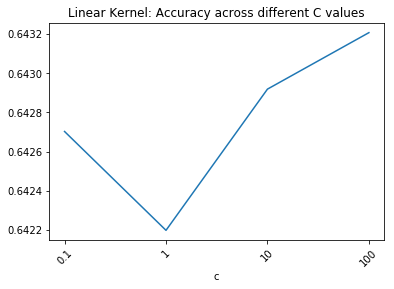

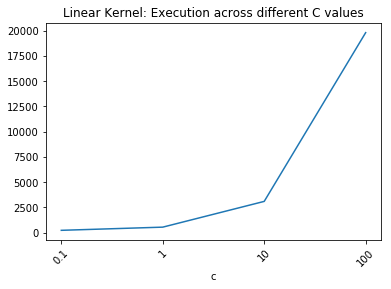

In [18]:
#linear
svm_linear_1, svm_linear_1_accuracy=svm_linear(X_train_1,Y_train_1,C_range)

Iterations of RBF SVM kernel:

C 0.1
gamma 0.1
accuracy: 0.65027027027
confusion matrix: 
 [[ 7029  6985]
 [ 2720 11016]]
 Time in seconds: 170.9692587852478

C 0.1
gamma 1
accuracy: 0.505009009009
confusion matrix: 
 [[14014     0]
 [13736     0]]
 Time in seconds: 269.4316773414612

C 0.1
gamma 10
accuracy: 0.505009009009
confusion matrix: 
 [[14014     0]
 [13736     0]]
 Time in seconds: 331.30098247528076

C 0.1
gamma 100
accuracy: 0.505009009009
confusion matrix: 
 [[14014     0]
 [13736     0]]
 Time in seconds: 402.0390818119049

C 1
gamma 0.1
accuracy: 0.887495495495
confusion matrix: 
 [[12796  1218]
 [ 1904 11832]]
 Time in seconds: 284.27551436424255

C 1
gamma 1
accuracy: 1.0
confusion matrix: 
 [[14014     0]
 [    0 13736]]
 Time in seconds: 323.3966546058655

C 1
gamma 10
accuracy: 1.0
confusion matrix: 
 [[14014     0]
 [    0 13736]]
 Time in seconds: 385.95288133621216

C 1
gamma 100
accuracy: 1.0
confusion matrix: 
 [[14014     0]
 [    0 13736]]
 Time in seconds: 4

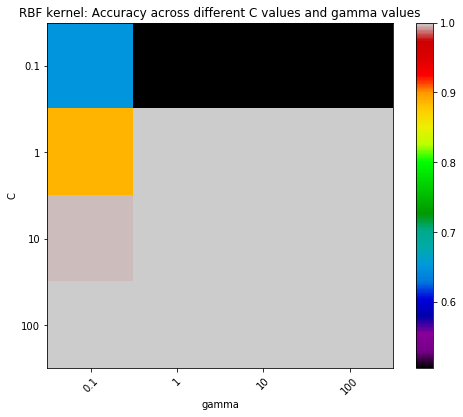

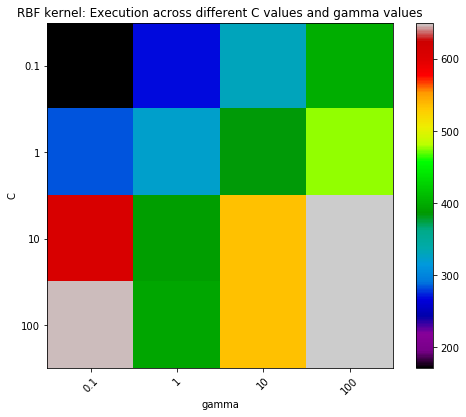

In [19]:
#rbf
svm_rbf_1, svm_rbf_1_accuracy=svm_rbf(X_train_1,Y_train_1,C_range,gamma_range)

Iterations of sigmoid SVM kernel:

C 0.1
gamma 0.1
coef0_range 0.0
accuracy: 0.524072072072
confusion matrix: 
 [[7437 6577]
 [6630 7106]]
 Time in seconds: 134.60339879989624

C 0.1
gamma 0.1
coef0_range 0.5
accuracy: 0.509261261261
confusion matrix: 
 [[7198 6816]
 [6802 6934]]
 Time in seconds: 149.5943787097931

C 0.1
gamma 1
coef0_range 0.0
accuracy: 0.513801801802
confusion matrix: 
 [[7273 6741]
 [6751 6985]]
 Time in seconds: 131.25355553627014

C 0.1
gamma 1
coef0_range 0.5
accuracy: 0.512288288288
confusion matrix: 
 [[7241 6773]
 [6761 6975]]
 Time in seconds: 128.2668652534485

C 0.1
gamma 10
coef0_range 0.0
accuracy: 0.512540540541
confusion matrix: 
 [[7255 6759]
 [6768 6968]]
 Time in seconds: 118.29174709320068

C 0.1
gamma 10
coef0_range 0.5
accuracy: 0.513189189189
confusion matrix: 
 [[7254 6760]
 [6749 6987]]
 Time in seconds: 111.78168940544128

C 0.1
gamma 100
coef0_range 0.0
accuracy: 0.514414414414
confusion matrix: 
 [[7276 6738]
 [6737 6999]]
 Time in seconds:

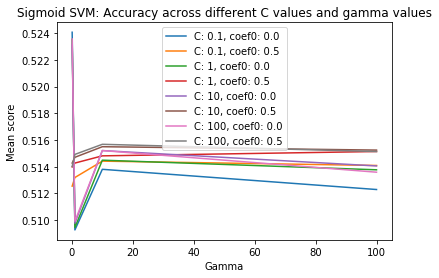

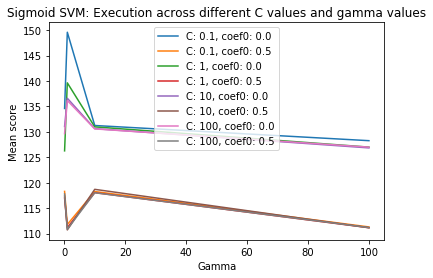

In [20]:
#sigmoid
svm_sigmoid_1, svm_sigmoid_1_accuracy=svm_sigmoid(X_train_1,Y_train_1,C_range,gamma_range,coef0_range)

In [27]:
max_accuracy=max(svm_linear_1_accuracy,svm_rbf_1_accuracy,svm_sigmoid_1_accuracy)
print("Maximum accuracy kernel for train data: rbf and the accuracy is:", max_accuracy*100)
accuracy_svm(svm_rbf_1,X_train_1,X_test_1,Y_train_1,Y_test_1,title='RBF SVM dataset:1')

Maximum accuracy kernel for train data: rbf and the accuracy is: 100.0

RBF SVM dataset:1
accuracy for train 100.0
confusion matrix for train [[14014     0]
 [    0 13736]]
accuracy for test 51.5217756852
confusion matrix for test [[5984 5682]
 [  84  144]]



First dataset - SVM  with cross validaiton

Cross Validaiton Results
0.642 (+/-0.002) for {'C': 0.1, 'kernel': 'linear'}
0.642 (+/-0.002) for {'C': 1, 'kernel': 'linear'}
0.642 (+/-0.001) for {'C': 10, 'kernel': 'linear'}
0.642 (+/-0.001) for {'C': 100, 'kernel': 'linear'}

Best Estimator: 
 SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best Estimator score: 0.642342342342



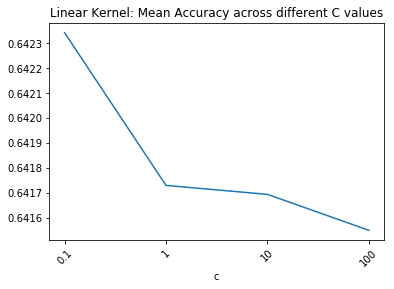

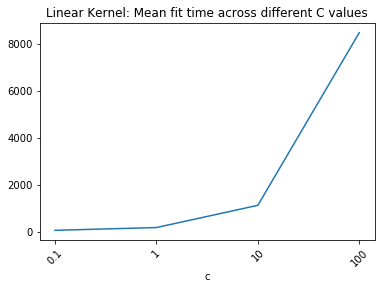

In [23]:
#svm linear with cv=3
parameters = [{'C': C_range, 'kernel':['linear']}]
clf_linear_1=svm_all(parameters,X_train_1,Y_train_1,C_range,0,0,kernel='linear')
#set random state

Cross Validaiton Results
0.614 (+/-0.012) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.505 (+/-0.000) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.505 (+/-0.000) for {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
0.505 (+/-0.000) for {'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}
0.648 (+/-0.011) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.506 (+/-0.002) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.505 (+/-0.000) for {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
0.505 (+/-0.000) for {'C': 1, 'gamma': 100, 'kernel': 'rbf'}
0.612 (+/-0.007) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.507 (+/-0.003) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.505 (+/-0.000) for {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
0.505 (+/-0.000) for {'C': 10, 'gamma': 100, 'kernel': 'rbf'}
0.610 (+/-0.006) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.507 (+/-0.003) for {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.505 (+/-0.000) for {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
0.505 (+/-0.000) for {'C': 100, 'gamma': 100, 'kernel'

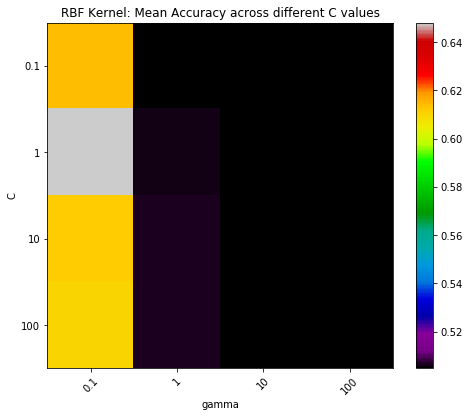

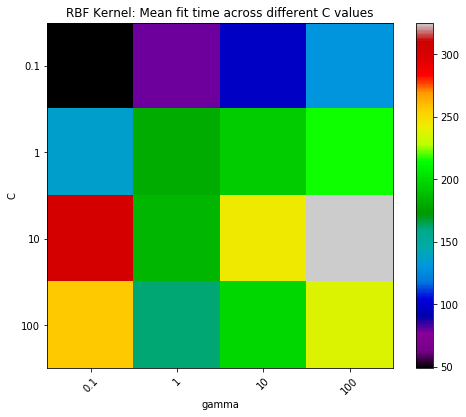

In [24]:
#svm rbf with cv=3
parameters = [{'C': C_range, 'gamma':gamma_range,'kernel':['rbf']}]
clf_rbf_1=svm_all(parameters,X_train_1,Y_train_1,C_range,gamma_range,0, kernel='rbf')
#set random states

Cross Validaiton Results
0.528 (+/-0.001) for {'C': 0.1, 'coef0': 0.0, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.517 (+/-0.002) for {'C': 0.1, 'coef0': 0.0, 'gamma': 1, 'kernel': 'sigmoid'}
0.520 (+/-0.003) for {'C': 0.1, 'coef0': 0.0, 'gamma': 10, 'kernel': 'sigmoid'}
0.517 (+/-0.001) for {'C': 0.1, 'coef0': 0.0, 'gamma': 100, 'kernel': 'sigmoid'}
0.511 (+/-0.007) for {'C': 0.1, 'coef0': 0.5, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.516 (+/-0.007) for {'C': 0.1, 'coef0': 0.5, 'gamma': 1, 'kernel': 'sigmoid'}
0.517 (+/-0.002) for {'C': 0.1, 'coef0': 0.5, 'gamma': 10, 'kernel': 'sigmoid'}
0.518 (+/-0.002) for {'C': 0.1, 'coef0': 0.5, 'gamma': 100, 'kernel': 'sigmoid'}
0.526 (+/-0.001) for {'C': 1, 'coef0': 0.0, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.517 (+/-0.004) for {'C': 1, 'coef0': 0.0, 'gamma': 1, 'kernel': 'sigmoid'}
0.518 (+/-0.005) for {'C': 1, 'coef0': 0.0, 'gamma': 10, 'kernel': 'sigmoid'}
0.517 (+/-0.001) for {'C': 1, 'coef0': 0.0, 'gamma': 100, 'kernel': 'sigmoid'}
0.511 (+/-0.005) for

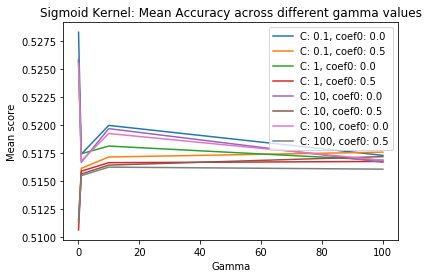

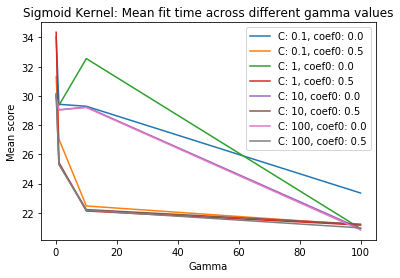

In [54]:
#sbf with sigmoid
parameters = [{'C': C_range, 'gamma':gamma_range, 'coef0':coef0_range,'kernel':['sigmoid']}]
clf_sigmoid_1=svm_all(parameters,X_train_1,Y_train_1,C_range,gamma_range,coef0_range, kernel='sigmoid')
#set random state

In [72]:
#maximum accuracy of all
max_accuracy2(clf_linear_1,clf_rbf_1,clf_sigmoid_1,X_train_1,X_test_1,Y_train_1,Y_test_1)

Accuracy of best estimator from SVM Linear: 64.2342342342
Accuracy of best estimator from SVM RBF: 64.8036036036
Accuracy of best estimator from SVM sigmoid: 52.8252252252
Maximum accuracy kernel for train data: rbf and the accuracy is: 64.8036036036
Paramters are : SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

RBF SVM dataset:1
accuracy for train 88.7495495495
confusion matrix for train [[12796  1904]
 [ 1218 11832]]
accuracy for test 64.0575079872
confusion matrix for test [[3866 2073]
 [2202 3753]]




kernel: [{'C': [0.1], 'gamma': [0.1], 'kernel': ['rbf']}]

size of the training data: [ 5550 11100 16650 22200 27750]
training data accuracy: [ 63.  64.  65.  65.  65.]
cross validaiton accuracy: [ 60.  61.  61.  61.  61.]
time taken: [  13.83   56.97  135.34  274.12  368.98]



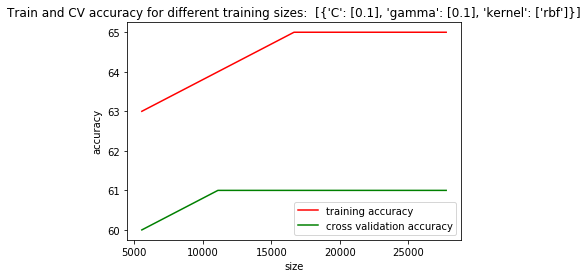

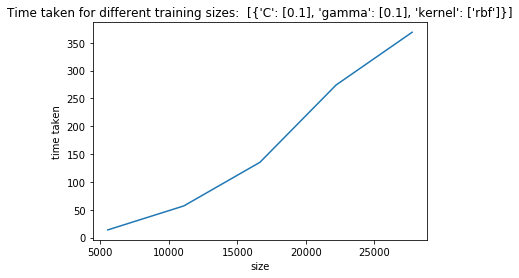


kernel: [{'C': [1], 'gamma': [0.1], 'kernel': ['rbf']}]

size of the training data: [ 5550 11100 16650 22200 27750]
training data accuracy: [ 94.  92.  90.  89.  89.]
cross validaiton accuracy: [ 63.  64.  64.  65.  65.]
time taken: [   12.44    64.92   200.95   574.26  1077.77]



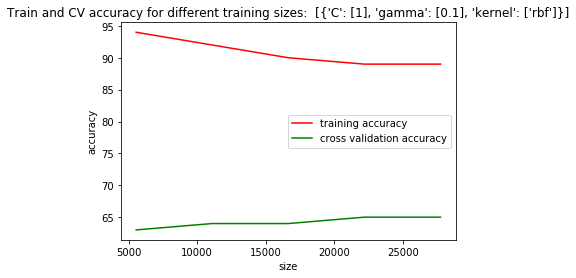

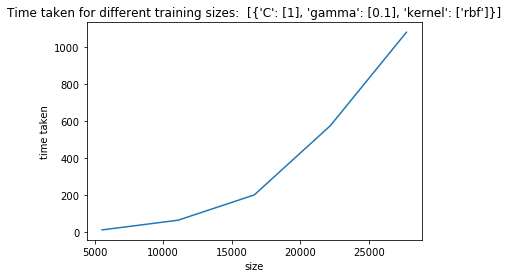


kernel: [{'C': [10], 'gamma': [0.1], 'kernel': ['rbf']}]

size of the training data: [ 5550 11100 16650 22200 27750]
training data accuracy: [ 100.  100.  100.  100.  100.]
cross validaiton accuracy: [ 60.  61.  62.  61.  61.]
time taken: [   25.82   169.62   656.81  1534.37  2551.6 ]



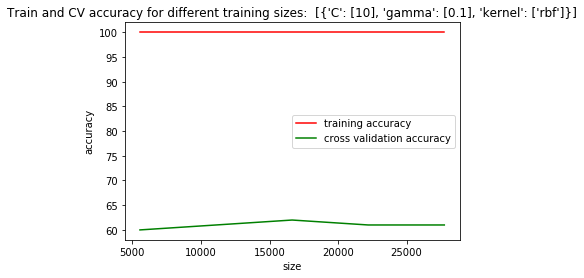

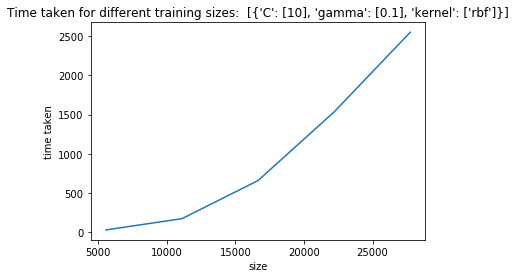

In [267]:
trainsize=[0.2,0.4,0.6,0.8,1.0]

#bias
parameters = [{'C': [0.1], 'gamma':[0.1],'kernel':['rbf']}]
size_1,train_acc_1,cv_acc_1,times_1=svm_size_vary(X_train_1,Y_train_1,trainsize,parameters)
svm_size_vary_plot(size_1,train_acc_1,cv_acc_1,times_1,str(parameters))

#normal
parameters = [{'C': [1], 'gamma':[0.1],'kernel':['rbf']}]
size_2,train_acc_2,cv_acc_2,times_2=svm_size_vary(X_train_1,Y_train_1,trainsize,parameters)
svm_size_vary_plot(size_2,train_acc_2,cv_acc_2,times_2,str(parameters))

#var
parameters = [{'C': [10], 'gamma':[0.1],'kernel':['rbf']}]
size_3,train_acc_3,cv_acc_3,times_3=svm_size_vary(X_train_1,Y_train_1,trainsize,parameters)
svm_size_vary_plot(size_3,train_acc_3,cv_acc_3,times_3,str(parameters))

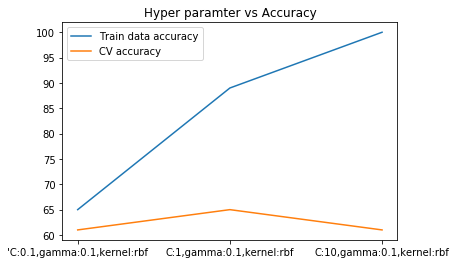

In [268]:
train_1=[train_acc_1[4],train_acc_2[4],train_acc_3[4]]
cv_1=[cv_acc_1[4],cv_acc_2[4],cv_acc_3[4]]
para_1=["'C:0.1,gamma:0.1,kernel:rbf","C:1,gamma:0.1,kernel:rbf","C:10,gamma:0.1,kernel:rbf"]
par=[0,1,2]
pl.xticks(par, para_1)
pl.plot(par, train_1, label="Train data accuracy")
pl.plot(par, cv_1, label="CV accuracy")
pl.legend()
pl.title("Hyper paramter vs Accuracy")
pl.show()
#train_acc_1

# SVM second dataset - without cross validation

Iterations of Linear SVM kernel:

C 0.1
accuracy: 0.902257986195
confusion matrix: 
 [[25056   524]
 [ 2294   957]]
 Time in seconds: 41.703986406326294

C 1
accuracy: 0.9028129444
confusion matrix: 
 [[25048   532]
 [ 2270   981]]
 Time in seconds: 53.91624569892883

C 10
accuracy: 0.902674204849
confusion matrix: 
 [[25047   533]
 [ 2273   978]]
 Time in seconds: 241.7814645767212

C 100
accuracy: 0.902639519961
confusion matrix: 
 [[25047   533]
 [ 2274   977]]
 Time in seconds: 2378.3971819877625


 Highest accuracy 0.9028129444
svc parameters of highest accuracy:
 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


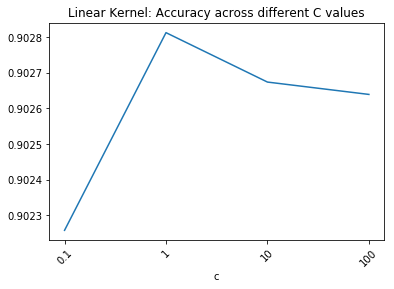

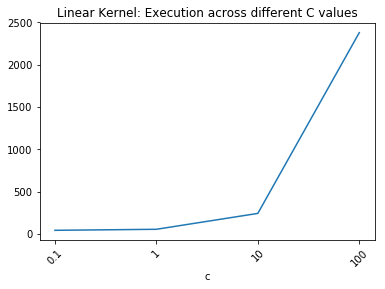

In [24]:
#linear
svm_linear_2, svm_linear_2_accuracy=svm_linear(X_train_2,Y_train_2,C_range)

Iterations of RBF SVM kernel:

C 0.1
gamma 0.1
accuracy: 0.907634143804
confusion matrix: 
 [[25222   358]
 [ 2305   946]]
 Time in seconds: 48.85459303855896

C 0.1
gamma 1
accuracy: 0.88723942978
confusion matrix: 
 [[25580     0]
 [ 3251     0]]
 Time in seconds: 254.8973388671875

C 0.1
gamma 10
accuracy: 0.88723942978
confusion matrix: 
 [[25580     0]
 [ 3251     0]]
 Time in seconds: 344.35479736328125

C 0.1
gamma 100
accuracy: 0.88723942978
confusion matrix: 
 [[25580     0]
 [ 3251     0]]
 Time in seconds: 492.4214406013489

C 1
gamma 0.1
accuracy: 0.932641947903
confusion matrix: 
 [[25206   374]
 [ 1568  1683]]
 Time in seconds: 64.84148168563843

C 1
gamma 1
accuracy: 0.989872012764
confusion matrix: 
 [[25577     3]
 [  289  2962]]
 Time in seconds: 345.94486832618713

C 1
gamma 10
accuracy: 0.998786028927
confusion matrix: 
 [[25580     0]
 [   35  3216]]
 Time in seconds: 405.51793360710144

C 1
gamma 100
accuracy: 0.99968783601
confusion matrix: 
 [[25580     0]
 [   

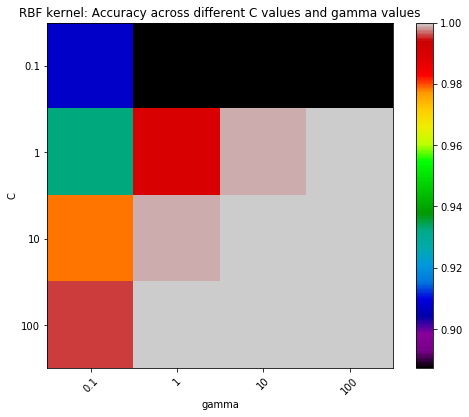

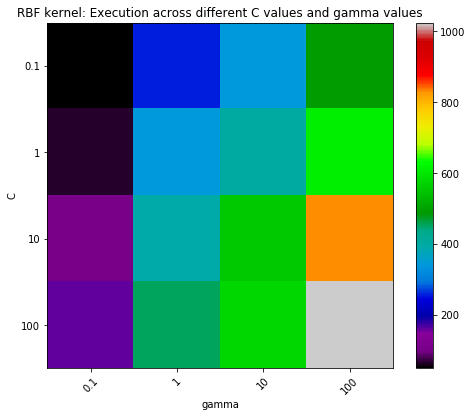

In [25]:
#rbf
svm_rbf_2, svm_rbf_2_accuracy=svm_rbf(X_train_2,Y_train_2,C_range,gamma_range)

Iterations of sigmoid SVM kernel:

C 0.1
gamma 0.1
coef0_range 0.0
accuracy: 0.862370365232
confusion matrix: 
 [[23714  1866]
 [ 2102  1149]]
 Time in seconds: 53.7149178981781

C 0.1
gamma 0.1
coef0_range 0.5
accuracy: 0.854635635254
confusion matrix: 
 [[23602  1978]
 [ 2213  1038]]
 Time in seconds: 60.828712463378906

C 0.1
gamma 1
coef0_range 0.0
accuracy: 0.827303943672
confusion matrix: 
 [[23116  2464]
 [ 2515   736]]
 Time in seconds: 63.62958216667175

C 0.1
gamma 1
coef0_range 0.5
accuracy: 0.826783670355
confusion matrix: 
 [[23113  2467]
 [ 2527   724]]
 Time in seconds: 62.55290150642395

C 0.1
gamma 10
coef0_range 0.0
accuracy: 0.840553570809
confusion matrix: 
 [[23293  2287]
 [ 2310   941]]
 Time in seconds: 47.988537311553955

C 0.1
gamma 10
coef0_range 0.5
accuracy: 0.824563837536
confusion matrix: 
 [[23068  2512]
 [ 2546   705]]
 Time in seconds: 53.85304808616638

C 0.1
gamma 100
coef0_range 0.0
accuracy: 0.824529152648
confusion matrix: 
 [[23070  2510]
 [ 2549 

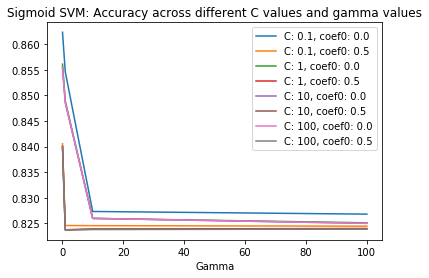

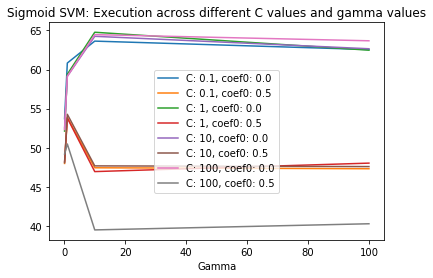

In [26]:
#sigmoid
svm_sigmoid_2, svm_sigmoid_2_accuracy=svm_sigmoid(X_train_2,Y_train_2,C_range,gamma_range,coef0_range)

In [27]:
max_accuracy=max(svm_linear_2_accuracy,svm_rbf_2_accuracy,svm_sigmoid_2_accuracy)
print("Maximum accuracy kernel for train data: rbf and the accuracy is:", max_accuracy*100)
accuracy_svm(svm_rbf_2,X_train_2,X_test_2,Y_train_2,Y_test_2,title='RBF SVM dataset:2')

Maximum accuracy kernel for train data: rbf and the accuracy is: 100.0

RBF SVM dataset:2
accuracy for train 100.0
confusion matrix for train 
 [[25580     0]
 [    0  3251]]
accuracy for test 88.743222465
confusion matrix for test 
 [[10964  1387]
 [    4     2]]



second data set with cross validation

Cross Validaiton Results
0.902 (+/-0.005) for {'C': 0.1, 'kernel': 'linear'}
0.902 (+/-0.006) for {'C': 1, 'kernel': 'linear'}
0.903 (+/-0.006) for {'C': 10, 'kernel': 'linear'}
0.903 (+/-0.006) for {'C': 100, 'kernel': 'linear'}

Best Estimator: 
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Best Estimator score: 0.902743574625



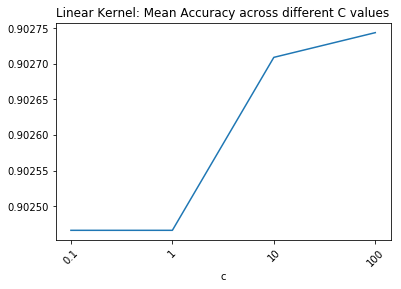

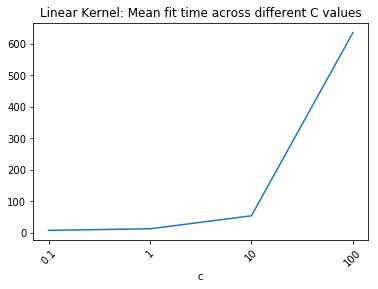

In [28]:
#svm linear with cv=3
parameters = [{'C': C_range, 'kernel':['linear']}]
clf_linear_2=svm_all(parameters,X_train_2,Y_train_2,C_range,0,0,kernel='linear')
#set random state

Cross Validaiton Results
0.903 (+/-0.002) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.887 (+/-0.000) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.887 (+/-0.000) for {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
0.887 (+/-0.000) for {'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}
0.911 (+/-0.005) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.887 (+/-0.000) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.887 (+/-0.000) for {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
0.887 (+/-0.000) for {'C': 1, 'gamma': 100, 'kernel': 'rbf'}
0.900 (+/-0.004) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.884 (+/-0.000) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.887 (+/-0.000) for {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
0.887 (+/-0.000) for {'C': 10, 'gamma': 100, 'kernel': 'rbf'}
0.889 (+/-0.006) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.883 (+/-0.001) for {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.887 (+/-0.000) for {'C': 100, 'gamma': 10, 'kernel': 'rbf'}
0.887 (+/-0.000) for {'C': 100, 'gamma': 100, 'kernel'

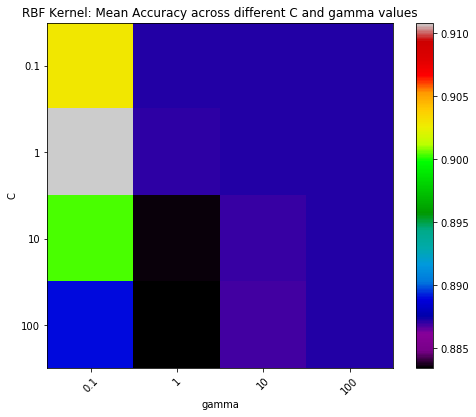

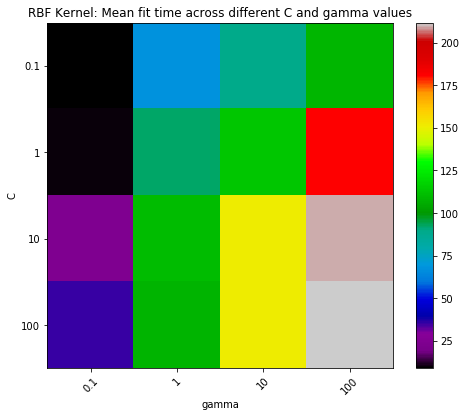

In [29]:
#svm rbf with cv=3
parameters = [{'C': C_range, 'gamma':gamma_range,'kernel':['rbf']}]
clf_rbf_2=svm_all(parameters,X_train_2,Y_train_2,C_range,gamma_range,0, kernel='rbf')
#set random state

Cross Validaiton Results
0.866 (+/-0.004) for {'C': 0.1, 'coef0': 0.0, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.830 (+/-0.008) for {'C': 0.1, 'coef0': 0.0, 'gamma': 1, 'kernel': 'sigmoid'}
0.836 (+/-0.020) for {'C': 0.1, 'coef0': 0.0, 'gamma': 10, 'kernel': 'sigmoid'}
0.829 (+/-0.008) for {'C': 0.1, 'coef0': 0.0, 'gamma': 100, 'kernel': 'sigmoid'}
0.858 (+/-0.007) for {'C': 0.1, 'coef0': 0.5, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.831 (+/-0.008) for {'C': 0.1, 'coef0': 0.5, 'gamma': 1, 'kernel': 'sigmoid'}
0.829 (+/-0.008) for {'C': 0.1, 'coef0': 0.5, 'gamma': 10, 'kernel': 'sigmoid'}
0.830 (+/-0.008) for {'C': 0.1, 'coef0': 0.5, 'gamma': 100, 'kernel': 'sigmoid'}
0.857 (+/-0.004) for {'C': 1, 'coef0': 0.0, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.829 (+/-0.007) for {'C': 1, 'coef0': 0.0, 'gamma': 1, 'kernel': 'sigmoid'}
0.836 (+/-0.020) for {'C': 1, 'coef0': 0.0, 'gamma': 10, 'kernel': 'sigmoid'}
0.828 (+/-0.008) for {'C': 1, 'coef0': 0.0, 'gamma': 100, 'kernel': 'sigmoid'}
0.850 (+/-0.005) for

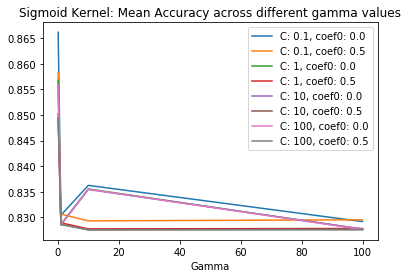

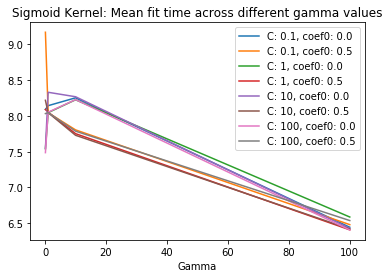

In [30]:
#sbf with sigmoid
parameters = [{'C': C_range, 'gamma':gamma_range, 'coef0':coef0_range,'kernel':['sigmoid']}]
clf_sigmoid_2=svm_all(parameters,X_train_2,Y_train_2,C_range,gamma_range,coef0_range, kernel='sigmoid')
#set random state

In [31]:
#maximum accuracy of all
max_accuracy2(clf_linear_2,clf_rbf_2,clf_sigmoid_2,X_train_2,X_test_2,Y_train_2,Y_test_2)

Accuracy of best estimator from SVM Linear: 90.2743574625
Accuracy of best estimator from SVM RBF: 91.0825153481
Accuracy of best estimator from SVM sigmoid: 86.6185702889

Maximum accuracy kernel for train data: rbf and the accuracy is: 91.0825153481
Paramters are : SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

RBF SVM dataset:1
accuracy for train 93.2641947903
confusion matrix for train 
 [[25206  1568]
 [  374  1683]]
accuracy for test 91.2195516711
confusion matrix for test 
 [[10674   791]
 [  294   598]]



Varying train size


kernel: [{'C': [1], 'kernel': ['linear']}]

size of the training data: [ 5766 11532 17298 23064 28831]
training data accuracy: [ 90.  90.  90.  90.  90.]
cross validaiton accuracy: [ 90.  90.  90.  90.  90.]
time taken: [   5.86   28.73   63.09  114.09  187.61]



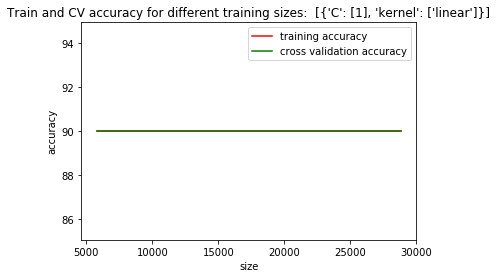

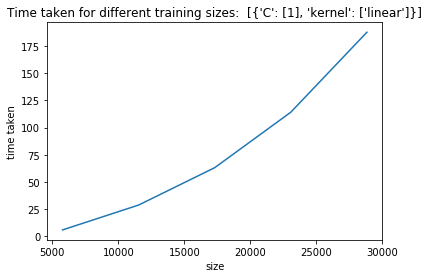


kernel: [{'C': [1], 'gamma': [0.1], 'kernel': ['rbf']}]

size of the training data: [ 5766 11532 17298 23064 28831]
training data accuracy: [ 94.  94.  94.  94.  93.]
cross validaiton accuracy: [ 90.  90.  91.  91.  91.]
time taken: [   8.39   31.61   67.56  121.49  202.49]



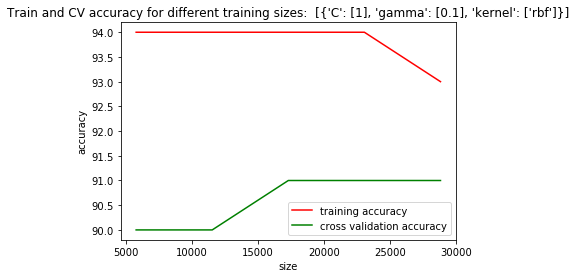

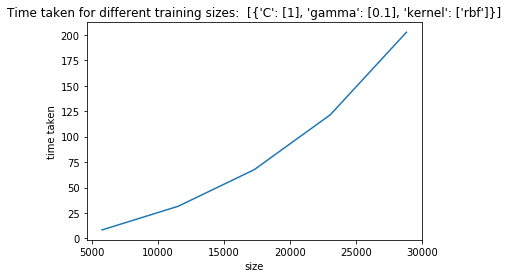


kernel: [{'C': [10], 'gamma': [0.1], 'kernel': ['rbf']}]

size of the training data: [ 5766 11532 17298 23064 28831]
training data accuracy: [ 99.  99.  98.  98.  98.]
cross validaiton accuracy: [ 89.  89.  89.  90.  90.]
time taken: [   9.04   33.17   87.34  189.9   394.65]



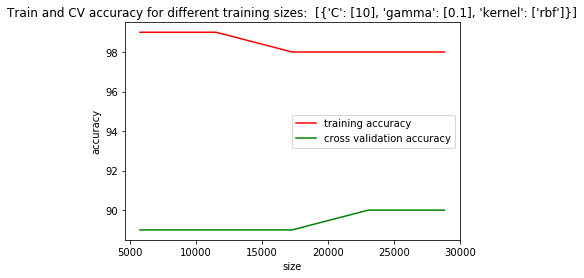

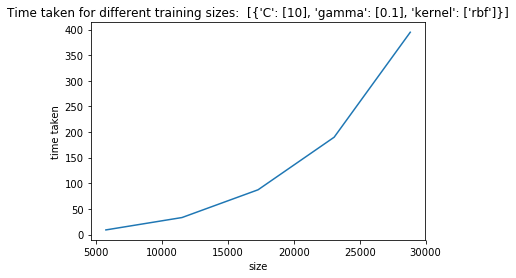

In [53]:
trainsize=[0.2,0.4,0.6,0.8,1.0]

#bias
parameters = [{'C': [1], 'kernel':['linear']}]
size_1,train_acc_1,cv_acc_1,times_1=svm_size_vary(X_train_2,Y_train_2,trainsize,parameters)
svm_size_vary_plot(size_1,train_acc_1,cv_acc_1,times_1,str(parameters))

#normal
parameters = [{'C': [1], 'gamma':[0.1],'kernel':['rbf']}]
size_2,train_acc_2,cv_acc_2,times_2=svm_size_vary(X_train_2,Y_train_2,trainsize,parameters)
svm_size_vary_plot(size_2,train_acc_2,cv_acc_2,times_2,str(parameters))

#var
parameters = [{'C': [10], 'gamma':[0.1],'kernel':['rbf']}]
size_3,train_acc_3,cv_acc_3,times_3=svm_size_vary(X_train_2,Y_train_2,trainsize,parameters)
svm_size_vary_plot(size_3,train_acc_3,cv_acc_3,times_3,str(parameters))

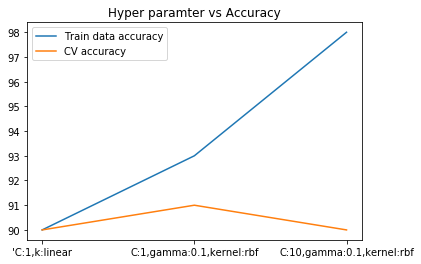

In [63]:
train_1=[train_acc_1[4],train_acc_2[4],train_acc_3[4]]
cv_1=[cv_acc_1[4],cv_acc_2[4],cv_acc_3[4]]
para_1=["'C:1,k:linear","C:1,gamma:0.1,kernel:rbf","C:10,gamma:0.1,kernel:rbf"]
par=[0,1,2]
pl.xticks(par, para_1)
pl.plot(par, train_1, label="Train data accuracy")
pl.plot(par, cv_1, label="CV accuracy")
pl.legend()
pl.title("Hyper paramter vs Accuracy")
pl.show()